In [ ]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip


--2023-04-24 15:11:14--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.02s   

2023-04-24 15:11:14 (146 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [ ]:
!unzip -nq spa-eng.zip

In [ ]:
!ls

sample_data  spa-eng  spa-eng.zip


In [ ]:
ls spa-eng

_about.txt  spa.txt


In [ ]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [ ]:
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  eng, spa = line.split("\t")
  if eng not in eng2spa:
    eng2spa[eng] = []
  eng2spa[eng].append(spa)

In [ ]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [ ]:
#to remove puncation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
tokenizer.tokenize('¡Pero qué día!'.lower())

['pero', 'qué', 'día']

In [ ]:
tokens = tokenizer.tokenize('¡Pero qué día!'.lower())
sentence_bleu([tokens], tokens)

/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [ ]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], "hi", smoothing_function=smoother.method4)

0.2213885886251307

In [ ]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [ ]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] = spa_list_tokens

In [ ]:
!pip install transformers sentencepiece transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tenso

In [ ]:
from transformers import pipeline
translater = pipeline("translation",
                      model='Helsinki-NLP/opus-mt-en-es', device=0)

/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translater('I like eggs and ham')

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [ ]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [ ]:
eng_phrases_subsets = eng_phrases[20_000:21_000]

In [ ]:
translations = translater(eng_phrases_subsets)

In [ ]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [ ]:
scores = []
for eng, pred in zip(eng_phrases_subsets, translations):
  matches = eng2spa_tokens[eng]

  spa_pred = tokenizer.tokenize(pred["translation_text"].lower())

  score = sentence_bleu(matches, spa_pred)
  scores.append(score)

/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

(array([649.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   2.,   2.,   3.,   0.,   0.,   0.,   0.,
         16.,   0.,   0.,   0.,   3.,   7.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 313.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

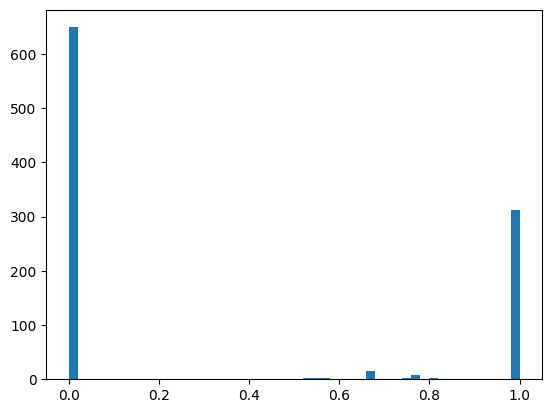

In [ ]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50)

In [ ]:
import numpy as np
np.mean(scores)

0.3383504014386889

# Franch Eng

In [ ]:
!unzip /content/drive/MyDrive/datasets/fra-eng.zip

Archive:  /content/drive/MyDrive/datasets/fra-eng.zip
  inflating: _about.txt              
  inflating: fra.txt                 


In [ ]:
!head fra.txt

Go.	Va !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)
Go.	Marche.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)
Go.	En route !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8267435 (felix63)
Go.	Bouge !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)
Hi.	Salut !	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)
Hi.	Salut.	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #4320462 (gillux)
Run!	Cours !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906331 (sacredceltic)
Run!	Courez !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906332 (sacredceltic)
Run!	Prenez vos jambes à vos cous !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #2077449 (sacredceltic)
Run!	File !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #2077454 (sacredceltic)


In [ ]:
eng2fra = {}
for line in open('fra.txt'):
  line = line.rstrip()
  eng, spa, _ = line.split("\t",2)
  if eng not in eng2fra:
    eng2fra[eng] = []
  eng2fra[eng].append(spa)

In [ ]:
eng2fra

{'Go.': ['Va !', 'Marche.', 'En route !', 'Bouge !'],
 'Hi.': ['Salut !', 'Salut.'],
 'Run!': ['Cours\u202f!',
  'Courez\u202f!',
  'Prenez vos jambes à vos cous !',
  'File !',
  'Filez !',
  'Cours !',
  'Fuyez !',
  'Fuyons !'],
 'Run.': ['Cours\u202f!',
  'Courez\u202f!',
  'Prenez vos jambes à vos cous !',
  'File !',
  'Filez !',
  'Cours !',
  'Fuyez !',
  'Fuyons !'],
 'Who?': ['Qui ?'],
 'Wow!': ['Ça alors\u202f!', 'Waouh\xa0!', 'Wah\xa0!'],
 'Duck!': ['À terre\xa0!', 'Baisse-toi\xa0!', 'Baissez-vous\xa0!'],
 'Fire!': ['Au feu !'],
 'Help!': ["À l'aide\u202f!"],
 'Hide.': ['Cache-toi.', 'Cachez-vous.'],
 'Jump!': ['Saute.'],
 'Jump.': ['Saute.'],
 'Stop!': ['Ça suffit\u202f!', 'Stop\u202f!', 'Arrête-toi !'],
 'Wait!': ['Attends !', 'Attendez !', 'Attendez.'],
 'Wait.': ['Attends !', 'Attendez !', 'Attends.', 'Attendez.'],
 'Begin.': ['Commencez.', 'Commence.'],
 'Go on.': ['Poursuis.', 'Continuez.', 'Poursuivez.'],
 'Hello!': ['Bonjour !', 'Salut !'],
 'I see.': ['Je comprends

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [ ]:
#to remove puncation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
tokenizer.tokenize('Est-ce fait ?'.lower())

['est', 'ce', 'fait']

In [ ]:
tokens = tokenizer.tokenize('¡Pero qué día!'.lower())
sentence_bleu([tokens], tokens)

/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [ ]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], "hi", smoothing_function=smoother.method4)

0.2213885886251307

In [ ]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [ ]:
eng2spa_tokens = {}
for eng, spa_list in eng2fra.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] = spa_list_tokens

In [ ]:
!pip install transformers sentencepiece transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline
translater = pipeline("translation",
                      model='Helsinki-NLP/opus-mt-en-fr', device=0)

/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translater('I like eggs and ham')

[{'translation_text': "J'aime les œufs et le jambon"}]

In [ ]:
eng_phrases = list(eng2fra.keys())
len(eng_phrases)

138912

In [ ]:
translations = translater(eng_phrases_subsets)

In [ ]:
scores = []
for eng, pred in zip(eng_phrases_subsets, translations):
  matches = eng2spa_tokens[eng]

  spa_pred = tokenizer.tokenize(pred["translation_text"].lower())

  score = sentence_bleu(matches, spa_pred, smoothing_function=smoother.method1)
  scores.append(score)

KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50)

In [ ]:
import numpy as np
np.mean(scores)